In [1]:
from src.DatasetManager import DatasetManager
%load_ext autoreload
%autoreload 2
#Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import Dataset
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','all-data.csv')

## Class for dealing to data sets
from src.DatasetManager import DatasetManager
## Class for dealing models
from src.ModelManager import ModelManager
## Class for dealing with common dataset processing tasks
from src.DatasetProcesser import DatasetProcessor, HFprocesser



In [2]:
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','all-data.csv')
from gensim.models import KeyedVectors
data_path = 'data/GoogleNews-vectors-negative300.bin'
word2vec_model = KeyedVectors.load_word2vec_format(data_path, binary=True)


### Deni

In [17]:
# Use the data set manager to load data frames for use with keras
dataset_manager.load_dataframe('unbalanced','data/financial_news_1.csv')
dataset_manager.load_dataframe('balanced','data/financial_news_2.csv')

Epoch 1/30
46/46 [==============================] - 1s 14ms/step - loss: 1.1130 - accuracy: 0.3464 - val_loss: 1.0960 - val_accuracy: 0.3626
Epoch 2/30
46/46 [==============================] - 0s 10ms/step - loss: 1.1243 - accuracy: 0.3202 - val_loss: 1.1000 - val_accuracy: 0.3187
Epoch 3/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1098 - accuracy: 0.3264 - val_loss: 1.0963 - val_accuracy: 0.3626
Epoch 4/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1087 - accuracy: 0.3471 - val_loss: 1.1004 - val_accuracy: 0.3022
Epoch 5/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1112 - accuracy: 0.3430 - val_loss: 1.0968 - val_accuracy: 0.3626
Epoch 6/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1008 - accuracy: 0.3568 - val_loss: 1.0990 - val_accuracy: 0.3077
Epoch 7/30
46/46 [==============================] - 0s 10ms/step - loss: 1.1111 - accuracy: 0.3402 - val_loss: 1.1001 - val_accuracy: 0.3352
Epoch 8/30
46

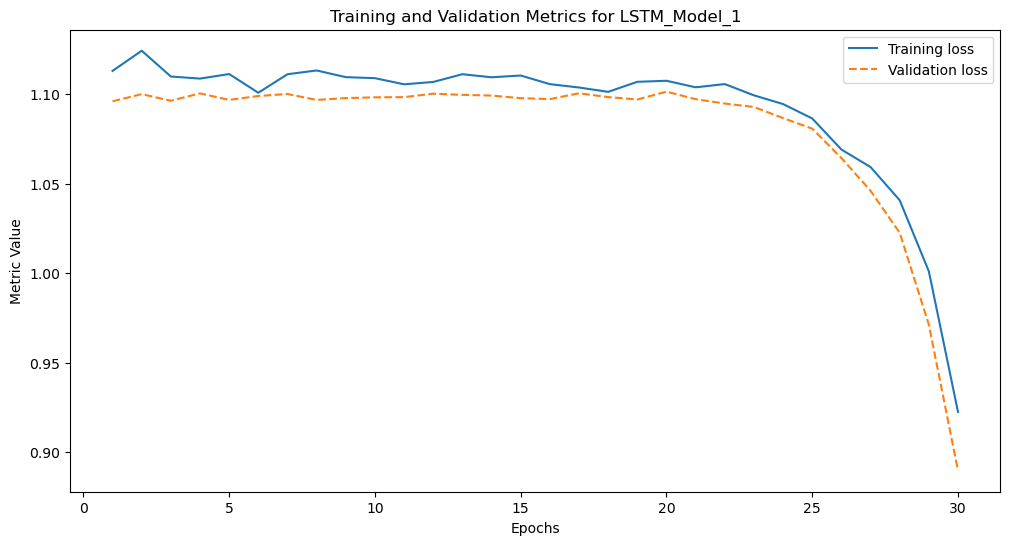

In [23]:
## This gets word embeddings from the words in the balanced dataset
embeddings = dataset_manager['balanced'].get_embeddings(word2vec_model=word2vec_model)
## this splits the dataset into test train validation data
tvt_dict = dataset_manager['balanced'].train_val_test_split(embeddings)
## init a model manager object that is capable of running models
model_manager = ModelManager() 
## the model manager class is capable of taking in a configuration dictionary


model_config_1 = {
    'model_name': 'LSTM_Model_1',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 32,
}

model_config_2 = {
    'model_name': 'LSTM_Model_2',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 10,
    'metrics': ['accuracy'],
}

## The model manager can run configurations
model_manager.run_model_config(tvt_dict, model_config_1)
model_manager.run_model_config(tvt_dict, model_config_2)

## It can also plot history of a given config model
model_manager.plot_model_history('LSTM_Model_1')


In [24]:
## The model manager can be used to make a prediction
y_pred_1 = model_manager.predict('LSTM_Model_2', tvt_dict['X_test'], return_class_indices=True)
model_manager.print_performance_metrics('LSTM_Model_2', tvt_dict['y_test'], y_pred_1, dataset_type='Imbalanced')


6/6 [==============================] - 0s 6ms/step
Accuracy Imbalanced data set for LSTM_Model_2: 0.78
F1 Score Imbalanced data set for LSTM_Model_2: 0.78


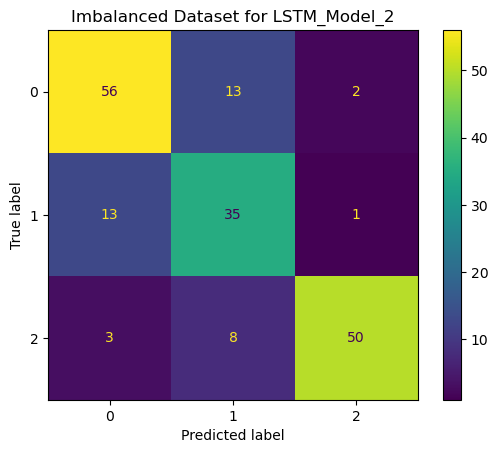

In [25]:
#You can also plot the confusion matrix
y_test_1_indices = tvt_dict['y_test'].argmax(axis=1)
model_manager.plot_confusion_matrix('LSTM_Model_2', y_test_1_indices, y_pred_1, title='Imbalanced Dataset')


## Hugging face transfer learning

In [4]:
from src.HFManager import HFManager
from src.DatasetProcesser import HFprocesser

# create datasets to be used with hugging face
dataset_manager.create_dataset('unbalanced_dataset', 'data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', 'data/financial_news_2.csv')

## Load the dataset which is a hugging face
HFproc = HFprocesser(dataset_manager.get_dataset('unbalanced_dataset'))
## Create train val train dict using hugging faces built in dataset\
hf_tvt_dict = HFproc.create_train_test_val_splits()
#





c:\Users\Rober\Anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

init


In [38]:
hf_tvt_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'news'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news'],
        num_rows: 388
    })
})

In [12]:
## tokenize the data
HFproc.tokenize_text_data() # stores tokenized test data in class attribute



DatasetDict({
    train: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 388
    })
})


DatasetDict({
    train: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 3876
    })
    test: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 582
    })
    valid: Dataset({
        features: ['label', 'news', 'input_ids', 'attention_mask'],
        num_rows: 388
    })
})

In [8]:
## Init the hugging face mananger whice also downloads the model
huggingface_manager = HFManager("distilbert/distilbert-base-uncased")
## add a model
huggingface_manager.add_model('main')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
## Get trainable layers
huggingface_manager.get_trainable_layers('main')


distilbert.embeddings.word_embeddings.weight True
distilbert.embeddings.position_embeddings.weight True
distilbert.embeddings.LayerNorm.weight True
distilbert.embeddings.LayerNorm.bias True
distilbert.transformer.layer.0.attention.q_lin.weight True
distilbert.transformer.layer.0.attention.q_lin.bias True
distilbert.transformer.layer.0.attention.k_lin.weight True
distilbert.transformer.layer.0.attention.k_lin.bias True
distilbert.transformer.layer.0.attention.v_lin.weight True
distilbert.transformer.layer.0.attention.v_lin.bias True
distilbert.transformer.layer.0.attention.out_lin.weight True
distilbert.transformer.layer.0.attention.out_lin.bias True
distilbert.transformer.layer.0.sa_layer_norm.weight True
distilbert.transformer.layer.0.sa_layer_norm.bias True
distilbert.transformer.layer.0.ffn.lin1.weight True
distilbert.transformer.layer.0.ffn.lin1.bias True
distilbert.transformer.layer.0.ffn.lin2.weight True
distilbert.transformer.layer.0.ffn.lin2.bias True
distilbert.transformer.lay

In [17]:
## Add a trainer user the manager
huggingface_manager.add_trainer('main',HFproc)
## Train 
huggingface_manager.trainers['main'].train()

  0%|          | 0/1455 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.5199, 'learning_rate': 3.2817869415807564e-05, 'epoch': 1.03}
